# Lesson 5 - 

In [1]:
import numpy
import math 
from matplotlib import pyplot
%matplotlib inline

In [2]:
#establish grid 
N = 100 
x_start, x_end = -5.0, 5.0
y_start, y_end = -2.0, 2.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x,y)

#print(x)
#print(y)

In [40]:
gamma = 5.0 #strength of vortex
n = 10 #number of vortices 

x_vortices = numpy.linspace(-3.4, 3.4, n) #x location of vortices 
y_vortices = numpy.linspace(0.02, 0.02, n)
strength_vortex = gamma*numpy.ones((n)) #strength of vortics\es

#print(x_vortices)
#print(strength_vortex)
#print(y_vortices)

## Finite row of vortices

In [41]:
def getVel_vortex_finite(strength, x, y, X, Y):
    """Returns the velocity field of a finite row of vortices
    
    strength: strength of vortex, float
    xi: x-coordinate of the ith vortex, float
    yi: y-coordinate of the ith vortex, float
    X: 2D numpy array of the vortex, x-coordinates
    Y: 2D numpy array of the vortex, y-coordinates
    
    u: x component of velocity vector field, 2D numpy array of floats
    v: y component of velocity vector field, 2D numpy array of floats
    """
    
    u_vortices = numpy.zeros((N, N))
    v_vortices = numpy.zeros((N, N))
    
    for i in range(0, len(strength)):
        u = + strength[i] / (2*math.pi)*(Y-y[i])/((X-x[i])**2 + (Y-y[i])**2)
        v = - strength[i] / (2*math.pi)*(X-x[i])/((X-x[i])**2 + (Y-y[i])**2)
        
        u_vortices += u
        v_vortices += v
    
    return u_vortices, v_vortices

In [42]:
def getStr_vortex_finite(strength, x, y, X, Y):
    """Returns stream function of a finite row of vortices
    
    strength: strength of vortex, float
    xi: x-coordinate of the ith vortex, float
    yi: y-coordinate of the ith vortex, float
    X: 2D numpy array of the vortex, x-coordinates
    Y: 2D numpy array of the vortex, y-coordinates
    
    psi: streamfunction 
    """
    
    psi_vortices = numpy.zeros((N,N))
    
    for i in range(0, len(strength)):
        psi = (strength[i] / (4*math.pi))*(numpy.log((X-x[i])**2 + (Y-y[i])**2))
        psi_vortices += psi
    
    return psi_vortices 

In [43]:
u_vortex, v_vortex = getVel_vortex_finite(strength_vortex, x_vortices, y_vortices, X, Y)
psi_vortex = getStr_vortex_finite(strength_vortex, x_vortices, y_vortices, X, Y)

#print(u_vortex, v_vortex)
#print(psi_vortex)

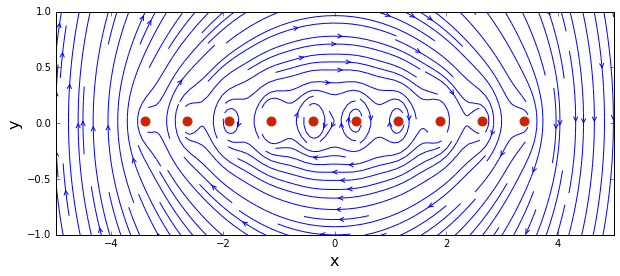

In [44]:
size = 10
pyplot.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start/2, y_end/2)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortices, y_vortices, color='#CD2305', s=80, marker='o')

In [45]:
#freestream information

u_inf = 0.5
u_freestream = u_inf * numpy.ones((N,N), dtype = float)
v_freestream = numpy.zeros((N,N), dtype = float)
psi_freestream = u_inf * Y


In [46]:
u = u_vortex + u_freestream
v = v_vortex + v_freestream
psi = psi_vortex + psi_freestream

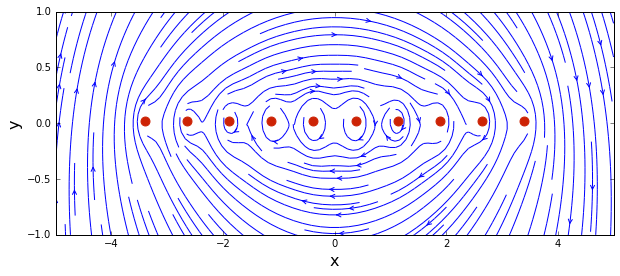

In [47]:
size = 10
pyplot.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start/2, y_end/2)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortices, y_vortices, color='#CD2305', s=80, marker='o')

# Infinite row of vortices

In [8]:
def getVel_vortex_inf(strength, x, y, N, a):
    
    u_vortices = numpy.zeros((N, N))
    v_vortices = numpy.zeros((N, N))
    
    for i in range(0, len(strength)):
        
        u = + strength[i] / (2*a) * (math.sin(2*math.pi*y[i]/a)/(math.acos(2*math.pi*y[i]/a)-math.cos(2*math.pi*x[i]/a)))
        v = - strength[i] / (2*a) * (math.sin(2*math.pi*x[i]/a)/(math.acos(2*math.pi*y[i]/a)-math.cos(2*math.pi*x[i]/a)))
    
        u_vortices += u
        v_vortices += v
    
    return u_vortices, v_vortices

In [ ]:
u_infVor, v_infVor = getVel_vortex_inf(strength)